# Titanic Case Study
Perform followings on dataset:
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Drop those columns which needs to be dropped
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city Vs PassengerClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_dataset.csv")

In [3]:
df.head(2)

,pclass,survived,name,Gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


#### Drop those columns which needs to be dropped

In [4]:
df.drop(["name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True) 
# inplace: used for modifying original df

In [5]:
df.head(2)

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


In [6]:
# df.pclass.size
# df.age.count()
df.age.size

1309

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
df.describe(include="all")

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,843,NaN,NaN,NaN,NaN,914
mean,2.294882,0.381971,NaN,29.881135,0.498854,0.385027,33.295479,NaN
std,0.837836,0.486055,NaN,14.413500,1.041658,0.865560,51.758668,NaN
min,1.000000,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


In [9]:
df.isnull().any() # One way to list columns which has missing values

pclass      False
survived    False
Gender      False
age          True
sibsp       False
parch       False
fare         True
embarked     True
dtype: bool

In [10]:
df.age.isnull().value_counts()

False    1046
True      263
Name: age, dtype: int64

#### Find out the data type of each column

In [11]:
df.dtypes

pclass        int64
survived      int64
Gender       object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

#### Find out the number of entries in each column

In [12]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df.age.isnull().any()

True

#### Find out which columns is having more number of missing values

In [14]:
df.age.isnull().value_counts()[True]

263

In [15]:
df.age.isnull().value_counts()[False]

1046

#### Replace missing values in each column and provide the reason for choosing one function to replace missing values

In [16]:
# fillna(<value for replacement>)
# df.age.mean()
df.age = df.age.fillna(df.age.mean())
# df.age.fillna(df.age.mean(),inplace=True)

###### To verify if missing values are replaced or not

In [17]:
df.age.isnull().any()

False

###### Replace in Fare column

In [18]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [19]:
df.fare.isnull().any()

False

###### Replace in Embarked column

In [20]:
df.embarked

0       S
1       S
2       S
3       S
4       S
5       S
6       S
7       S
8       S
9       C
10      C
11      C
12      C
13      S
14      S
15      S
16      C
17      C
18      C
19      C
20      S
21      S
22      C
23      C
24      S
25      C
26      C
27      C
28      S
29      S
       ..
1279    S
1280    S
1281    S
1282    S
1283    S
1284    S
1285    S
1286    C
1287    S
1288    S
1289    S
1290    S
1291    S
1292    S
1293    S
1294    S
1295    S
1296    S
1297    S
1298    S
1299    C
1300    C
1301    C
1302    C
1303    C
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [21]:
# df.embarked.mode()[0]
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [22]:
df.embarked.isnull().any()

False

###### Just verify if any True or missing values are there in whole dataset

In [23]:
df.isnull().any()

pclass      False
survived    False
Gender      False
age         False
sibsp       False
parch       False
fare        False
embarked    False
dtype: bool

In [24]:
# col = ["age","fare"]
# for column in col:
#     if df[column].isnull().any():
#         df[column].fillna(df[column].mean(),inplace=True)
#     else:
#         pass
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [25]:
df.embarked.isnull().any()

False

In [26]:
df.age.isnull().value_counts()

False    1309
Name: age, dtype: int64

#### Find out total number of Male/Female passengers

In [27]:
df.Gender.value_counts()

male      843
female    466
Name: Gender, dtype: int64

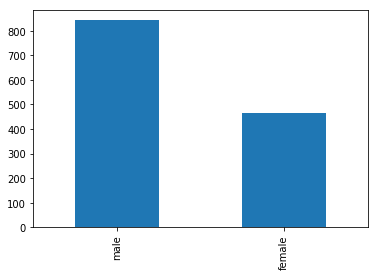

In [28]:
df.Gender.value_counts().plot(kind="bar")
plt.show()

#### Find out total number of passengers in each passenger class

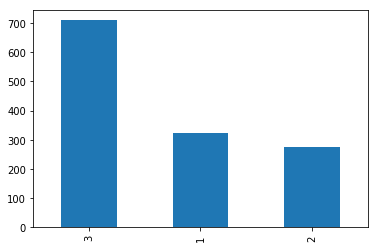

In [29]:
df.pclass.value_counts().plot(kind="bar")
plt.savefig("test.png")
plt.show()
# df.embarked.value_counts().plot(kind="kde")
# plt.show()

#### Find out total number of Survived/Not-survived passengers

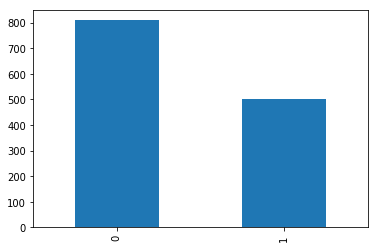

In [30]:
df.survived.value_counts().plot(kind="bar")
plt.show()

#### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

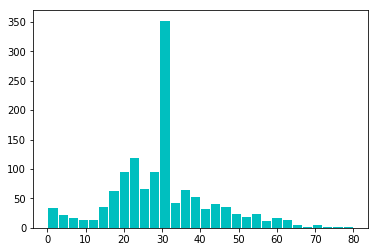

In [31]:
plt.hist(df.age,bins=30,rwidth=.9,color = "c")  # where bins = to create more number of bucket to have more 
                                    # granular level distribution
                                    # rwidth = to control width of bars

plt.show()

In [32]:
age_grp1 = df.age.where(df.age<=30)
age_grp2 = df.age.where((df.age>30) & (df.age<=60))
age_grp3 = df.age.where(df.age>60) 

print(age_grp1.count())    # size : to get total number of observations and count will 
                    # return exact number of non NaN values
print(age_grp2.count())
print(age_grp3.count())

872
404
33


In [34]:
plt.hist(age_grp1,label = "age<=30")
plt.hist(age_grp2,label = "age>30 & age<=60")
plt.hist(age_grp3,label = "age>30")
plt.legend()
plt.show()

ValueError: max must be larger than min in range parameter.

#### Find out which age group survived

In [41]:
df.where(df.survived == 1).age.count()

500

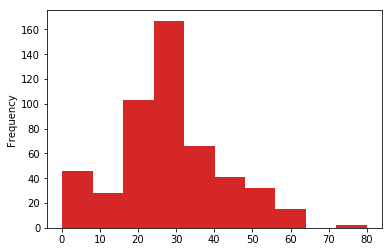

In [40]:
df.where(df.survived == 1).age.plot(kind="hist")
plt.show()

#### Find out total number of passengers city Vs PassengerClass

# Groupby

In [ ]:
# Syntax:
# <dataframe>.groupby(<column names as list>)

In [42]:
df.head(2)

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


In [44]:
grp1 = df.groupby(["embarked","pclass"])
grp1

In [49]:
len(grp1.groups.keys())

9

In [50]:
grp1.groups

{('C', 1): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 ('C',
  2): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 ('C',
  3): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  654,  657,  658,
             ...
             1286, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307],
            dtype='int64', length=101),
 ('Q', 1): Int64Index([206, 207, 208], dtype='int64'),
 ('Q', 2): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 ('Q',
  3): Int64Index([ 667,  682,  683,  684,  686,  692,  693,  694,  695,  702,
             ...
             1149, 1162, 1163, 1167, 1193, 1195, 1198, 1215, 1216, 1249],
            dtype='int64', length=113),
 ('S', 1): Int64Index([ 

In [60]:
# ('C', 1)
# grp1.get_group(('C', 1)).Gender.count()
grp1.get_group(('C', 1)).Gender.size

141

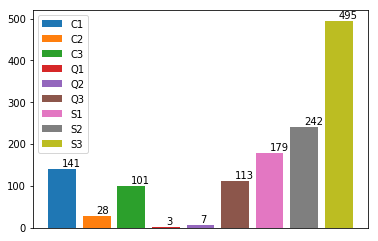

In [79]:
cnt = 0
for k in grp1.groups.keys():
#     plt.bar(k[0]+str(k[1]),grp1.get_group(k).Gender.size)
    plt.bar(cnt,grp1.get_group(k).Gender.size,label = k[0]+str(k[1]))
    plt.text(cnt,grp1.get_group(k).Gender.size+5,grp1.get_group(k).Gender.size)
    cnt +=1
plt.legend()
plt.xticks([])
# plt.axis("off")
plt.show()

In [80]:
df.head(2)

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


# Create a group of Gender Vs Survived Vs embarked and plot the bar graph of their counts

In [81]:
grp2 = df.groupby(["Gender","survived","embarked"])
grp2

In [83]:
len(grp2.groups.keys())

12

In [84]:
grp2.groups

{('female',
  0,
  'C'): Int64Index([105, 169, 650, 665, 666, 679, 681, 706, 928, 1304, 1305], dtype='int64'),
 ('female',
  0,
  'Q'): Int64Index([ 667,  682,  684,  692,  695,  702,  710,  726,  779,  800,  841,
              859,  865,  961,  987,  992, 1008, 1012, 1054, 1076, 1095, 1124,
             1146],
            dtype='int64'),
 ('female',
  0,
  'S'): Int64Index([   2,    4,  286,  365,  369,  381,  382,  411,  445,  456,  468,
              475,  490,  575,  599,  610,  623,  624,  626,  627,  628,  632,
              636,  687,  696,  697,  743,  749,  806,  807,  811,  828,  829,
              832,  840,  852,  861,  864,  877,  878,  901,  903,  907,  908,
              932,  937,  939,  943,  955,  956,  957,  958,  966,  967,  969,
              975, 1011, 1013, 1014, 1058, 1086, 1090, 1091, 1098, 1099, 1100,
             1106, 1112, 1113, 1126, 1130, 1136, 1147, 1151, 1153, 1156, 1158,
             1172, 1173, 1174, 1175, 1180, 1208, 1209, 1211, 1227, 1230, 1231,
   

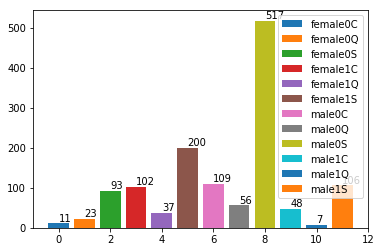

In [90]:
cnt = 0
for k in grp2.groups.keys():
    plt.bar(cnt,grp2.get_group(k).Gender.size,label = k[0]+str(k[1])+str(k[2]))
    plt.text(cnt,grp2.get_group(k).Gender.size+5,grp2.get_group(k).Gender.size)
    cnt +=1
plt.legend()
# plt.xticks([])
# plt.axis("off")
plt.show()

# Subplotting

In [97]:
tmp = np.random.randint(1,100,60).reshape(10,6)
df1 = pd.DataFrame(tmp,columns=["A","B","C","D","E","F"])
df1

,A,B,C,D,E,F
0,9,10,55,82,56,74
1,26,43,95,69,4,51
2,80,68,96,92,9,86
3,69,36,80,6,35,96
4,42,33,64,87,98,38
5,85,71,18,63,92,28
6,87,25,75,49,34,41
7,79,82,16,57,40,9
8,86,73,28,83,77,34
9,49,32,40,80,1,1


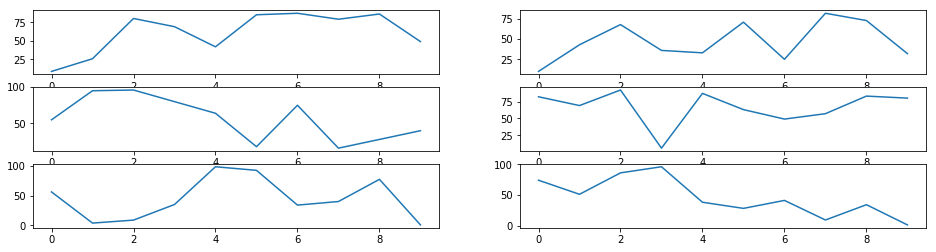

In [105]:
plt.figure(figsize=(16,4))
plt.subplot(3,2,1)
plt.plot(range(10),df1.A)
plt.subplot(3,2,2)
plt.plot(range(10),df1.B)
plt.subplot(3,2,3)
plt.plot(range(10),df1.C)
plt.subplot(3,2,4)
plt.plot(range(10),df1.D)
plt.subplot(3,2,5)
plt.plot(range(10),df1.E)
plt.subplot(3,2,6)
plt.plot(range(10),df1.F)
plt.show()

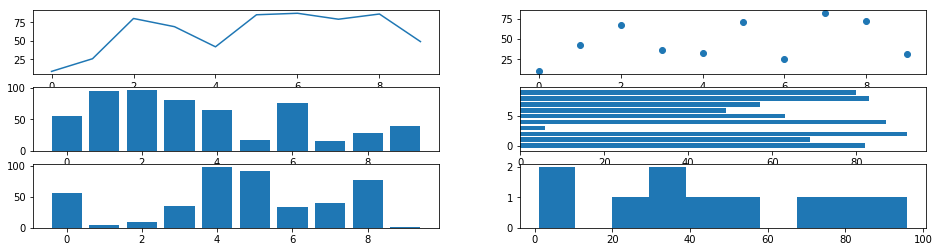

In [111]:
plt.figure(figsize=(16,4))
plt.subplot(3,2,1)
plt.plot(range(10),df1.A)
plt.subplot(3,2,2)
plt.scatter(range(10),df1.B)
plt.subplot(3,2,3)
plt.bar(range(10),df1.C)
plt.subplot(3,2,4)
plt.barh(range(10),df1.D)
plt.subplot(3,2,5)
plt.bar(range(10),df1.E)
plt.subplot(3,2,6)
plt.hist(df1.F)
plt.show()

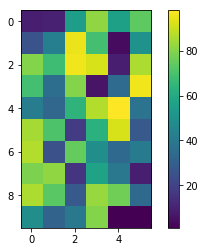

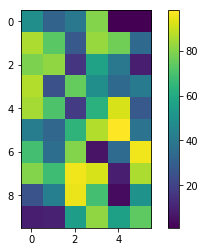

In [119]:
plt.imshow(df1)
plt.colorbar()
plt.show()
plt.imshow(df1[::-1])
plt.colorbar()
plt.show()

In [120]:
plt.imread("test.png")

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       

In [121]:
df.head(2)

,pclass,survived,Gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


In [122]:
df.to_html("df_html.htm")

In [124]:
df.to_csv("df_csv.csv")

# merge data frame

In [131]:
df2 = df1[["A","B","C"]]
df3 = df1[["A","E","F"]]
# print(df2)
# print(df3)

In [133]:
pd.merge(df2,df3,indicator=True)

,A,B,C,E,F,_merge
0,9,10,55,56,74,both
1,26,43,95,4,51,both
2,80,68,96,9,86,both
3,69,36,80,35,96,both
4,42,33,64,98,38,both
5,85,71,18,92,28,both
6,87,25,75,34,41,both
7,79,82,16,40,9,both
8,86,73,28,77,34,both
9,49,32,40,1,1,both


In [137]:
pd.merge(df2,df3,how = "outer",indicator=True)

,A,B,C,E,F,_merge
0,9,10,55,56,74,both
1,26,43,95,4,51,both
2,80,68,96,9,86,both
3,69,36,80,35,96,both
4,42,33,64,98,38,both
5,85,71,18,92,28,both
6,87,25,75,34,41,both
7,79,82,16,40,9,both
8,86,73,28,77,34,both
9,49,32,40,1,1,both


# Sorting

In [142]:
df2.sort_index(ascending=False)

,A,B,C
9,49,32,40
8,86,73,28
7,79,82,16
6,87,25,75
5,85,71,18
4,42,33,64
3,69,36,80
2,80,68,96
1,26,43,95
0,9,10,55


In [141]:
df2.sort_index(ascending=False,axis=1)

,C,B,A
0,55,10,9
1,95,43,26
2,96,68,80
3,80,36,69
4,64,33,42
5,18,71,85
6,75,25,87
7,16,82,79
8,28,73,86
9,40,32,49


In [145]:
df2.sort_values(by="A",ascending=False)

,A,B,C
6,87,25,75
8,86,73,28
5,85,71,18
2,80,68,96
7,79,82,16
3,69,36,80
9,49,32,40
4,42,33,64
1,26,43,95
0,9,10,55


In [146]:
df2.sort_values(by="B",ascending=False)

,A,B,C
7,79,82,16
8,86,73,28
5,85,71,18
2,80,68,96
1,26,43,95
3,69,36,80
4,42,33,64
9,49,32,40
6,87,25,75
0,9,10,55


In [153]:
df4 = df2[0:3]
df5 = df2[3:6]
print(df4)
print("\n")
print(df5)

    A   B   C
0   9  10  55
1  26  43  95
2  80  68  96


    A   B   C
3  69  36  80
4  42  33  64
5  85  71  18


In [152]:
df4.append(df5)

,A,B,C
0,9,10,55
1,26,43,95
2,80,68,96
3,69,36,80
4,42,33,64
5,85,71,18


# Concatenate

In [159]:
pd.concat([df4,df5],axis=0)

,A,B,C
0,9,10,55
1,26,43,95
2,80,68,96
3,69,36,80
4,42,33,64
5,85,71,18


In [160]:
pd.concat([df4,df5],axis=1)

,A,B,C,A,B,C
0,9.0,10.0,55.0,NaN,NaN,NaN
1,26.0,43.0,95.0,NaN,NaN,NaN
2,80.0,68.0,96.0,NaN,NaN,NaN
3,NaN,NaN,NaN,69.0,36.0,80.0
4,NaN,NaN,NaN,42.0,33.0,64.0
5,NaN,NaN,NaN,85.0,71.0,18.0


In [162]:
df4.join(df5,rsuffix="_")

,A,B,C,A_,B_,C_
0,9,10,55,NaN,NaN,NaN
1,26,43,95,NaN,NaN,NaN
2,80,68,96,NaN,NaN,NaN


In [163]:
df2

,A,B,C
0,9,10,55
1,26,43,95
2,80,68,96
3,69,36,80
4,42,33,64
5,85,71,18
6,87,25,75
7,79,82,16
8,86,73,28
9,49,32,40


In [164]:
df2.dtypes

A    int32
B    int32
C    int32
dtype: object

In [167]:
df2.C = df2.C.astype("str")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [168]:
df2.dtypes

A     int32
B     int32
C    object
dtype: object

In [170]:
df2.C = df2.C.astype("int8")

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [178]:
df2.C.std().round()

30.0